For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Mehul Jain, Satyam Shivastava, Pritish Arora__

Step 1: Train your own word embeddings
--------------------------------

(describe the provided dataset that you have chosen here)

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

(describe your dataset here)

In [65]:
# import your libraries here
import pandas as pd
import string
import re 
import nltk

from gensim.models import Word2Vec
from collections import Counter
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# download stopwords list
nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /Users/mehuljain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehuljain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### a) Train embeddings on GIVEN dataset

In [85]:
# preprocessing function
def preprocess(sentence:str, train:bool)-> list:
    """
    This function takes in a string and performs the following preprocessing steps:
    1. remove punctuation and URLs
    2. tokenization
    3. lower case
    4. removing stop words
    5. stemming /lemmatization (still thinking about it)
    6. padding ??
    """
    # remove punctuation
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    
    # remove urls
    sentence=re.sub(r'http\S+', '', sentence)

    # tokenize using nltk
    tokenized=nltk.word_tokenize(sentence)
    
    # lower case all the tokens
    tokenized=[t.lower() for t in tokenized]

    # remove stopwords
    if train:
        tokenized=[w for w in tokenized if w not in STOPWORDS]
        
    # remove single words and numbers
    # removing single words because I don't thinks there are any useful words that are 
    # made of just a single letter
    # also we dont have a use of numbers in our word embeddings 
    tokenized=[t for t in tokenized if len(t)>1 and not bool(re.search("\d",t))]
    
    # do we want a lexicon check to see if the words make sense?
        
    # add padding
    tokenized= list(nltk.lm.preprocessing.pad_both_ends(tokenized, n=2))
    
    return tokenized

In [86]:
# code to train your word embeddings

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

# read the dataset
df=pd.read_csv('data/spooky-author-identification/train.csv')

# make a list of all the sentences in the dataset
sentences= list(df['text'])

# preprocess the text
tokenized=[preprocess(s,True) for s in sentences]

In [87]:
# list of all words from dataset A
all_words=[]
for t in tokenized:
    all_words.extend(t)
    
# count frequency of all words
mc1=Counter(all_words)

In [88]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDINGS_SIZE
# min_count = 1
model=Word2Vec(tokenized,
               min_count=1,
               vector_size=EMBEDDINGS_SIZE,
               sg=1,
               window=5,
               workers=4) 

In [89]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(model.wv)))

Vocab size 24926


In [90]:
# You can save file in txt format, then load later if you wish.
model.wv.save_word2vec_format('data/embeddings.txt', binary=False)

### b) Train embedding on YOUR dataset

In [91]:
# then do a second data set
# first let's try to use the sklearn newsgroup dataset
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

Let's see an example of the text in the dataset

In [92]:
newsgroups.data[3]

"\nThink!\n\nIt's the SCSI card doing the DMA transfers NOT the disks...\n\nThe SCSI card can do DMA transfers containing data from any of the SCSI devices\nit is attached when it wants to.\n\nAn important feature of SCSI is the ability to detach a device. This frees the\nSCSI bus for other devices. This is typically used in a multi-tasking OS to\nstart transfers on several devices. While each device is seeking the data the\nbus is free for other commands and data transfers. When the devices are\nready to transfer the data they can aquire the bus and send the data.\n\nOn an IDE bus when you start a transfer the bus is busy until the disk has seeked\nthe data and transfered it. This is typically a 10-20ms second lock out for other\nprocesses wanting the bus irrespective of transfer time.\n"

In [93]:
# preprocess the text
tokenized2=[preprocess(s,True) for s in newsgroups.data]

In [94]:
# list of all words from dataset B
all_words2=[]
for t in tokenized2:
    all_words2.extend(t)
    
# count frequency of all words
mc2=Counter(all_words2)

Let's train our word embeddings

In [95]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
model2=Word2Vec(tokenized2,
               min_count=1,
               vector_size=EMBEDDINGS_SIZE,
               sg=1,
               window=5,
               workers=4)
print('Vocab size {}'.format(len(model2.wv)))

# save the word embeddings
model2.wv.save_word2vec_format('data/newsgroups_embeddings.txt', binary=False)

Vocab size 90526


In [96]:
model2.wv['computer']

array([-0.3269199 , -0.53018975, -0.02424794,  0.21104273,  0.3910596 ,
       -0.47095212, -0.26838672,  0.26384363,  0.10549603, -0.03189427,
       -0.37299955, -0.27076572, -0.26402506,  0.06091175,  0.04907518,
       -0.03979132, -0.02924556, -0.3754503 ,  0.07862531, -0.25128573,
       -0.36514696, -0.11196227, -0.17286761, -0.12540278, -0.16707383,
        0.00543346,  0.50334644, -0.6118879 , -0.3036259 , -0.38411105,
        0.1883328 , -0.25764996,  0.25212157, -0.00645011,  0.35173702,
        0.20554294,  0.50589544, -0.23106065, -0.31574467,  0.3933311 ,
        0.33498955,  0.27715313, -0.27723777, -0.23268715,  0.6094148 ,
        0.00718852,  0.35156754, -0.3359236 ,  0.17866158, -0.225975  ,
        0.6583368 , -0.22249469,  0.45025322,  0.10542428, -0.06241921,
       -0.4642421 ,  0.6228616 , -0.00524375, -0.08936204, -0.11263487,
       -0.5993839 ,  0.20496538,  0.18074831,  0.07970686, -0.15453789,
        0.3542144 , -0.21678007,  0.6116204 , -0.08278342,  0.16

What text-normalization and pre-processing did you do and why? __YOUR ANSWER HERE__

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [224]:
# import libraries here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [59]:
model.wv.most_similar('man', topn=10)

[('woman', 0.8957732915878296),
 ('gentleman', 0.8696836829185486),
 ('things', 0.8644973635673523),
 ('ones', 0.8530060052871704),
 ('strange', 0.8491724729537964),
 ('lady', 0.8385950922966003),
 ('good', 0.8370099663734436),
 ('young', 0.8298354148864746),
 ('terrible', 0.8247286677360535),
 ('little', 0.8241771459579468)]

In [60]:
model2.wv.most_similar('man', topn=10)

[('woman', 0.6987707614898682),
 ('spider', 0.6640673875808716),
 ('amazing', 0.6531776785850525),
 ('story', 0.6458855271339417),
 ('devil', 0.6441273093223572),
 ('animal', 0.6427311897277832),
 ('wickedness', 0.6420684456825256),
 ('beautiful', 0.6410014629364014),
 ('credited', 0.639991819858551),
 ('rose', 0.6380173563957214)]

The two word embeddings have certainly learned different representations for the same word. Let's try to quantify this difference.

<b>Analysis strategy 1:</b>

1. Take 5 most common words from dataset A and 5 from dataset B (not a good idea, instead let's look for the most relevant words). Maybe we should use Tf-Idf and sort the words with the highest values?
2. Apply T-SNE and visualize the clusters
3. Visualize the word embeddings in 3D space

<b>Analysis strategy 2:</b>


In [196]:
def clusters(words: list, model)-> (list,list):
    """
    This function takes in a list of words and returns two lists:
    1. the first list contains all embedding values
    2. the second list contains the list of words similar to the input words
    
    Maybe we should return a dictionary like {word:[(word,embedding)]}
    
    Parameters:
    words: the list of relevant words
    model: Word2Vec model to be used
    
    Returns:
    embedding clusters: list of list
    word_clusters: list of list
    """
    
    # embedding clusters and word clusters
    ec=[]
    wc=[]
    
    for w in words:
        
        embeddings=[]
        similar_words=[]
        
        for sw, _ in model.wv.most_similar(w, topn=30):
            
            # add embedding vector
            embeddings.append(model.wv[sw])
            
            # add similar word
            similar_words.append(sw)
        
        # add list of embeddings
        # add list of similar words
        ec.append(embeddings)
        wc.append(similar_words)
        
    return ec , wc

In [201]:
def plot_clusters(e_clusters, w_clusters, labels, title):
    """
    Add function description
    """
    
    # what is the figure size?
    plt.figure(figsize=(12,8))
    
    # what colors should the clusters be?
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    
    
    for label, embeddings, words, color in zip(labels,e_clusters,w_clusters,colors):
        
        # seperate x and y dimension of the embeddings 
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        
        c=color.reshape(1,-1)
        
        plt.scatter(x, y, c=c, alpha=0.7, label=label)
        
        for i, word in enumerate(words):
            
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
            
    # the legend should be outside the figure        
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    # plot the title
    plt.title(title)
    
    plt.grid(True)
    
#     if filename:
#         plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')

    # plot the clusters 
    plt.show()

Implement Tf-Idf to find the relevant words

In [203]:
# make a list of the relevant words
relevant_words=["story","man","ghost","night","evil",\
                "information","source","word","president","article"]

# get list of embedding vectors and similar words
embed_cl,word_cl= clusters(relevant_words, model)
embed_cl2,word_cl2= clusters(relevant_words,model2)

# convert into numpy arrays
embed_cl=np.array(embed_cl)
embed_cl2=np.array(embed_cl2)

Let's visualize for the first dataset

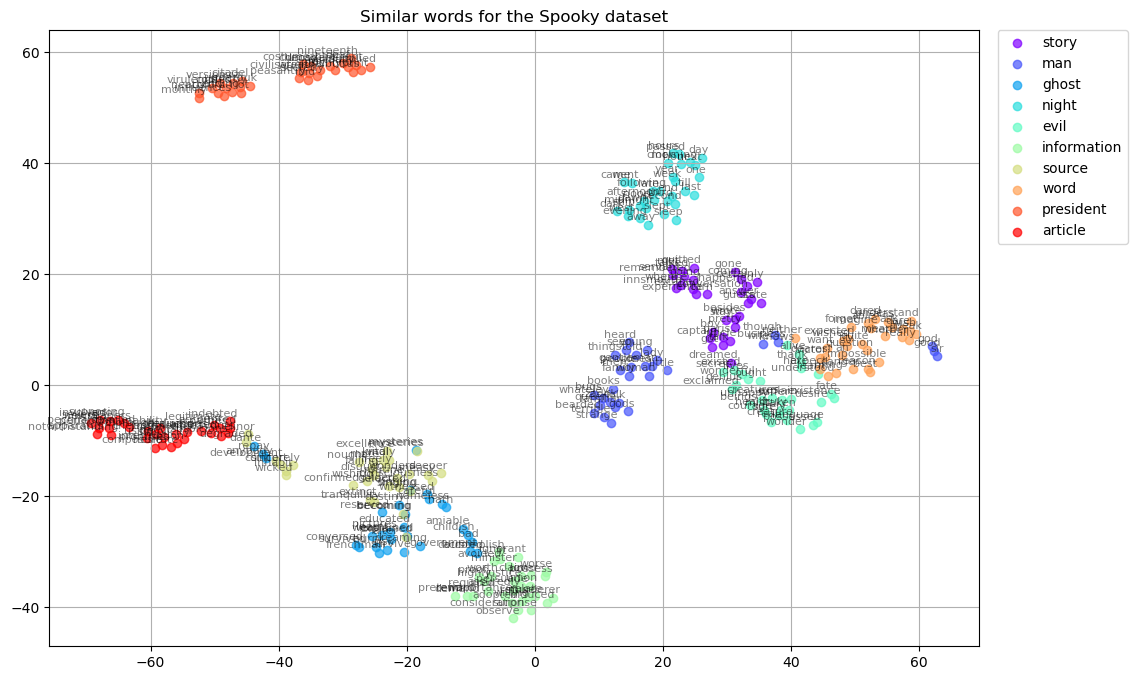

In [215]:
n, m, k = embed_cl.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=42)
embeddings2d = np.array(tsne_model2d.\
                        fit_transform(embed_cl.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl, relevant_words, "Similar words for the Spooky dataset" )

Let's visualize for the second dataset

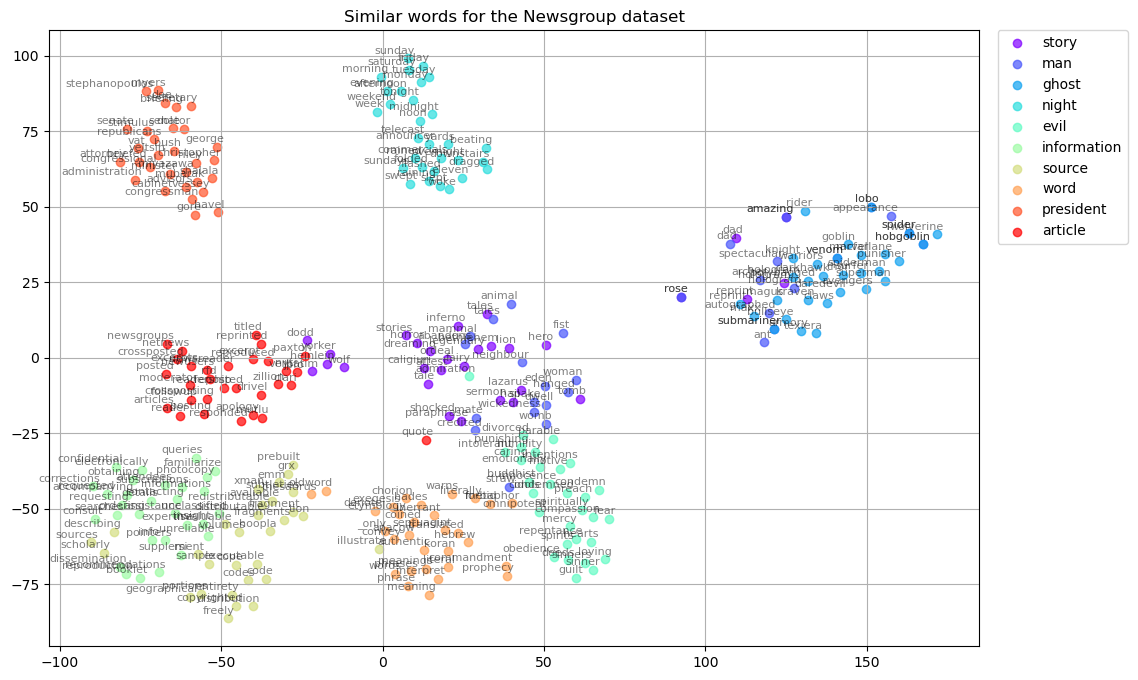

In [214]:
n, m, k = embed_cl2.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=42)
embeddings2d = np.array(tsne_model2d.\
                        fit_transform(embed_cl2.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl2, relevant_words, "Similar words for the Newsgroup dataset" )

##Write down your analysis:

Cite your sources:
-------------
1. [Google News and Leo Tolstoy: Visualizing Word2Vec Word Embeddings using t-SNE](https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d)
2. [How to Solve Analogies with Word2Vec](https://towardsdatascience.com/how-to-solve-analogies-with-word2vec-6ebaf2354009)
3. []()

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [187]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data)
# encoded = tokenizer.texts_to_sequences(data)


### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [188]:
def generate_ngram_training_samples(ngram: list) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    pass


### c) Then, split the sequences into X and y and create a Data Generator

In [189]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

In [190]:
def read_embeddings():
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    pass



In [191]:
def data_generator(X: list, y: list, num_sequences_per_batch: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    pass



In [192]:
# Examples
# initialize data_generator
# num_sequences_per_batch = 128 # this is the batch size
# steps_per_epoch = len(sequences)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X, y, num_sequences_per_batch)

# sample=next(train_generator) # this is how you get data out of generators
# sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# sample[1].shape   # (batch_size, |V|) to_categorical

### d) Train your models

In [193]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API



In [194]:
# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch,
          epochs=1)

AttributeError: 'Word2Vec' object has no attribute 'fit'

### e) Generate Sentences

In [ ]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    pass

### f) Compare your generated sentences

Sources Cited
----------------------------
